In [1]:
import bw2data as bwd
import bw2calc as bwc
import matplotlib.pyplot as plt
from ulcarchetype.ulcarchetype import LCIAMethod
import statistics
import stats_arrays
import pandas as pd
import numpy as np

In [2]:
from bw2calc.monte_carlo import MonteCarloLCA

In [3]:
bwd.projects.set_current('test_ulcarchetype')

In [4]:
testdb = bwd.Database('test_db')
act2 = testdb.get('activity_2')
act1 = testdb.get('activity_1')

In [5]:
m = bwd.Method(('test method','1 unspecified'))
m

Brightway2 Method: test method: 1 unspecified

In [6]:
for k,v in m.load():
    f = bwd.get_activity(k)
    print(f,v)

'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'low population density, long-term')) 1
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')) 1
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'non-urban air or from high stacks')) 1
'Particulate Matter, < 2.5 um' (kilogram, None, ('air',)) 10
'Particulate Matter, < 2.5 um' (kilogram, None, ('air', 'urban air close to ground')) 10


define uncertain impact assessment methods

### uniform

In [7]:
testmethod_u = LCIAMethod()
testmethod_u.transform_method(m)
testmethod_u.set_uncertainty_type(4)

In [8]:
testmethod_u.build_cf_list()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'uncertainty type': 4,
   'minimum': 1,
   'maximum': 10,
   'amount': 10,
   'loc': 5.5}),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10)]

***

In [9]:
new_method_name=('test method','1 unspecified','uncertain','uniform','v2')

In [10]:
metadata_test_method={'description':'method to test uncertainty on archetype using dataclasses',
                      'unit':'DALY'}

instantiate a new bw method, store the metadata

In [11]:
new_method = bwd.Method(new_method_name)

In [12]:
new_method.register(**metadata_test_method)

In [13]:
new_method.write(testmethod_u.build_cf_list())

In [14]:
lca = bwc.LCA({act2:1},
             method=('test method','1 unspecified','uncertain','uniform','v2'))

lca.lci()
lca.lcia()
lca.score

100.0

In [15]:
next(lca)
lca.score

100.0

In [16]:
mc_u = MonteCarloLCA({act2:1},
             method=('test method','1 unspecified','uncertain','uniform','v2'))

In [17]:
mc_u.lci()
mc_u.lcia()
next(mc_u)

results_uncertain_u = []
for _ in range(1000):
    next(mc_u)
    results_uncertain_u.append(mc_u.score)

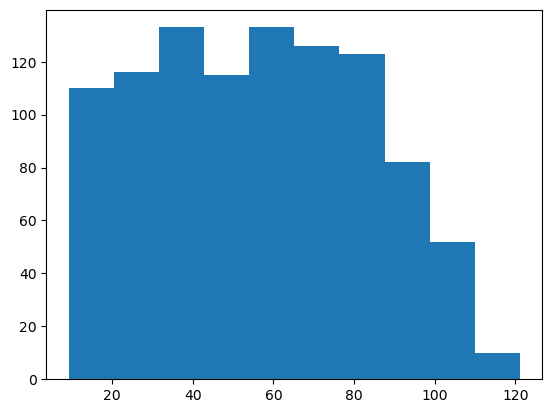

In [18]:
_ = plt.hist(results_uncertain_u);

## triangular

In [19]:
testmethod_t = LCIAMethod()
testmethod_t.transform_method(m)
testmethod_t.set_uncertainty_type(5)

In [20]:
testmethod_t.build_cf_list()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'uncertainty type': 5,
   'minimum': 1,
   'maximum': 10,
   'amount': 10,
   'loc': 5.5}),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10)]

In [21]:
new_method_name_t=('test method','1 unspecified','uncertain','triangular','v2')

In [22]:
metadata_test_method={'description':'method to test uncertainty on archetype using dataclasses',
                      'unit':'DALY'}

instantiate a new bw method, store the metadata

In [23]:
new_method = bwd.Method(new_method_name_t)

In [24]:
new_method.register(**metadata_test_method)

In [25]:
new_method.write(testmethod_t.build_cf_list())

___

In [26]:
lca = bwc.LCA({act2:1},
             method=('test method','1 unspecified','uncertain','triangular','v2'))

lca.lci()
lca.lcia()
lca.score

100.0

In [27]:
mc_t = bwc.monte_carlo.MonteCarloLCA({act2:1},method=('test method','1 unspecified','uncertain','triangular','v2'))
mc_t.lci()
mc_t.lcia()
next(mc_t)

results_uncertain_t = []
for _ in range(1000):
    next(mc_t)
    results_uncertain_t.append(mc_t.score)

## normal (truncated)

In [28]:
testmethod_norm = LCIAMethod()
testmethod_norm.transform_method(m)
testmethod_norm.set_uncertainty_type(3)

In [29]:
for cf in testmethod_norm.cfs:
    if cf.uncertainty_param != {}:
        cf.uncertainty_param['scale']= statistics.stdev(cf.values_possible)

In [30]:
testmethod_norm.build_cf_list()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'uncertainty type': 3,
   'minimum': 1,
   'maximum': 10,
   'amount': 10,
   'loc': 5.5,
   'scale': 6.363961030678928}),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10)]

In [31]:
new_method_name_n=('test method','1 unspecified','uncertain','normal','v2')

In [32]:
new_method = bwd.Method(new_method_name_n)

In [33]:
new_method.register(**metadata_test_method)

In [34]:
new_method.write(testmethod_norm.build_cf_list())

In [35]:
mc_n = bwc.monte_carlo.MonteCarloLCA({act2:1},method=('test method','1 unspecified','uncertain','normal','v2'))
mc_n.lci()
mc_n.lcia()
next(mc_n)

results_uncertain_n = []
for _ in range(1000):
    next(mc_n)
    results_uncertain_n.append(mc_n.score)

In [36]:
bwd.Method(('test method','1 unspecified','uncertain','normal','v2')).load()

[(('biosphere3', '051aaf7a-6c1a-4e86-999f-85d5f0830df6'), 1),
 (('biosphere3', 'ddd99a3a-be86-423d-b36a-a9dc8af1b1f8'), 1),
 (('biosphere3', '66f50b33-fd62-4fdd-a373-c5b0de7de00d'), 1),
 (('biosphere3', '21e46cb8-6233-4c99-bac3-c41d2ab99498'),
  {'uncertainty type': 3,
   'minimum': 1,
   'maximum': 10,
   'amount': 10,
   'loc': 5.5,
   'scale': 6.363961030678928}),
 (('biosphere3', '230d8a0a-517c-43fe-8357-1818dd12997a'), 10)]

### reference case

In [37]:
mc_ref = bwc.monte_carlo.MonteCarloLCA({act2:1},method=('test method','1 unspecified'))
mc_ref.lci()
mc_ref.lcia()
next(mc_ref)

results_ref = []
for _ in range(1000):
    next(mc_ref)
    results_ref.append(mc_ref.score)

## plot

in the deterministic case the only observed uncertainty is from technosphere flows. when uncertainty of CFs is considered the score is more uncertain

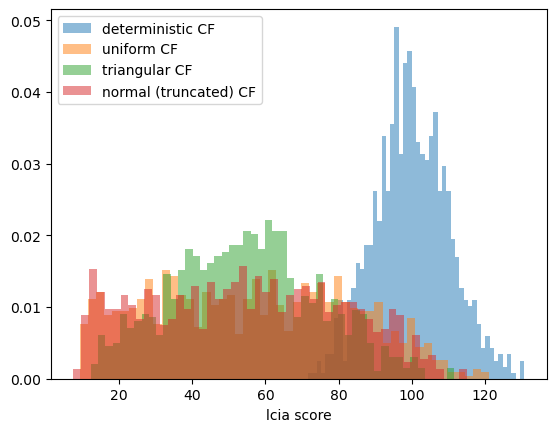

In [39]:
plt.hist(results_ref,density=True,alpha=0.5,label='deterministic CF',bins=50);
plt.hist(results_uncertain_u,density=True,alpha=0.5,label='uniform CF',bins=50);
plt.hist(results_uncertain_t,density=True,alpha=0.5,label='triangular CF',bins=50);
plt.hist(results_uncertain_n,density=True,alpha=0.5,label='normal (truncated) CF',bins=50);
plt.legend();
plt.xlabel('lcia score');

the acvity 1 does not have uncertain technosphere flows. we can use it to check the shape of the underlying probability distribution

In [41]:
mc_n_act1 = bwc.monte_carlo.MonteCarloLCA({act1:1},method=('test method','1 unspecified','uncertain','normal','v2'))

In [42]:
mc_t_act1 = bwc.monte_carlo.MonteCarloLCA({act1:1},method=('test method','1 unspecified','uncertain','triangular','v2'))

In [43]:
results_uncertain_n_act1 = [next(mc_n_act1) for _ in range(0,6000)]

In [44]:
results_uncertain_t_act1 = [next(mc_t_act1) for _ in range(0,6000)]

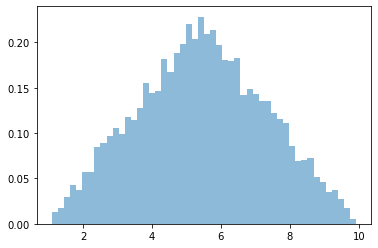

In [45]:
plt.hist(results_uncertain_t_act1,density=True,alpha=0.5,label='triangular CF',bins=50);

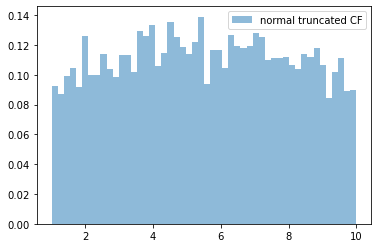

In [46]:
plt.hist(results_uncertain_n_act1,density=True,alpha=0.5,label='normal truncated CF',bins=50);
plt.legend();

although the results do not look gaussian bear in mind that it is a truncated normal. If we plot the truncated vs non-truncated this becomes apparent

In [47]:
uncertain_cf = [cf for code,cf in bw.Method(('test method','1 unspecified','uncertain','normal','v2')).load() if isinstance(cf,dict)][0]
uncertain_cf

{'uncertainty type': 3,
 'minimum': 1,
 'maximum': 10,
 'amount': 10,
 'loc': 5.5,
 'scale': 6.363961030678928}

In [48]:
uncertain_cf_nontruncated = uncertain_cf.copy()
uncertain_cf_nontruncated['minimum']=np.nan
uncertain_cf_nontruncated['maximum']=np.nan

In [49]:
uncertain_variable1 = stats_arrays.UncertaintyBase.from_dicts(uncertain_cf,uncertain_cf_nontruncated)

In [50]:
df = pd.DataFrame([next(stats_arrays.MCRandomNumberGenerator(uncertain_variable1)) for _ in range(1000)],
                  columns=['normal truncated','normal non-truncated'])

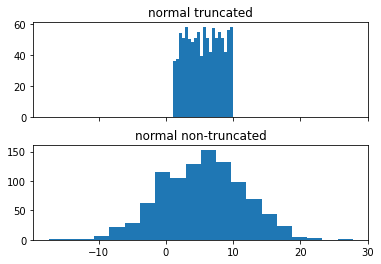

In [51]:
df.hist(sharex=True,grid=False,layout=(2,1),bins=20);

for the moment if we try to transform a method that already has uncertain cf a ValueError is raised

In [54]:
test_test = LCIAMethod()
try:
    test_test.transform_method(bw.Method(('test method','1 unspecified','uncertain','normal','v2')))
except ValueError as ve:
    print(ve)


for the moment uncertain CF are not supported {'uncertainty type': 3, 'minimum': 1, 'maximum': 10, 'amount': 10, 'loc': 5.5, 'scale': 6.363961030678928}
